In [1]:
import pandas as pd
import numpy as np
import matplotlib as mtlb

In [9]:
url = "C:/Users/aaabd/Desktop/april.xlsx"

In [10]:
df = pd.read_excel(url)

Okay, lets first do some preprocessing and data cleaning tasks

In [11]:
df = df.rename(columns={"100101-00007":"branch_name", "sap_id":"sales_id", "replace_time":"sales_time"})

In [12]:
df = df[['branch_name', 'parent_category_name', 'category_name', 'product_name', 'sales_id', 'sales_time']]

In [13]:
df.isnull().any()

branch_name             False
parent_category_name     True
category_name           False
product_name            False
sales_id                False
sales_time              False
dtype: bool

We have some rows with a "company_name" that are useless for analysis, so we drop them

In [15]:
df = df[df['branch_name']!='company_name']

In [10]:
df.groupby('branch_name')['branch_name', 'product_name'].count().sort_values(by=['product_name'], ascending=False)

,branch_name,product_name
branch_name,,
Shedevr,2918,2918
Юнусобод,2016,2016
Чиланзар,1790,1790
Салом,1643,1643
Сергели,1067,1067
Караташ,1064,1064
Файзабад,931,931


This table shows the total sales amount by branches

In [16]:
df.dtypes

branch_name             object
parent_category_name    object
category_name           object
product_name            object
sales_id                object
sales_time              object
dtype: object

In [59]:
df.head()

,branch_name,parent_category_name,category_name,product_name,sales_id,sales_time
0,Shedevr,Вода/Напитки,Соки,Сок Сочная Долина Томатный 1л,010101-00260,2019-04-01 10:32:17
1,Shedevr,Яйца / Молоко и молочные изделия,Йогурт,Йогурт Нежный 1.2% с соком абр-ман 100г,020303-00129,2019-04-01 18:46:09
2,Shedevr,Яйца / Молоко и молочные изделия,Йогурт,Йогурт Saltanat термос. греческий 4% 300г,020303-00473,2019-04-01 12:44:54
3,Shedevr,Яйца / Молоко и молочные изделия,Творог,Творог Домашний 9 % 400 гр,020401-00075,2019-04-01 11:33:28
4,Shedevr,Яйца / Молоко и молочные изделия,Каймак/Сливки,Каймак Домашний 50% 200гр,020503-00026,2019-04-01 11:33:28


now we will have to change the data type of each column

In [21]:
df.shape

(11429, 6)

Below we change the data type of sales_time columns from object (string) to date_time

In [17]:
df['sales_time'] = pd.to_datetime(df['sales_time'])

In [18]:
df.dtypes

branch_name                     object
parent_category_name            object
category_name                   object
product_name                    object
sales_id                        object
sales_time              datetime64[ns]
dtype: object

The following table shows the most sold products in the whole month

In [19]:
df.groupby( ['category_name','product_name'])['sales_time'].count().sort_values(ascending=False).head(20)

category_name          product_name                                                         
Овощи                  Помидоры грунт, вес                                                      207
                       Огурцы, вес                                                              165
                       Капуста, вес                                                             130
                       Картофель молодой, вес                                                   124
Фрукты                 Яблоки Голден отборные, вес                                              104
                       Клубника мелкая, упак                                                     98
                       Клубника отборная, упак 300г                                              97
                       Яблоко Беш юлдуз, вес                                                     96
                       Яблоко Чимган, вес                                                        96
Багеты/

In [9]:
df.columns

Index(['branch_name', 'parent_category_name', 'category_name', 'product_name',
       'sales_id', 'sales_time'],
      dtype='object')

In [51]:
df.columns

Index(['branch_name', 'parent_category_name', 'category_name', 'product_name',
       'sales_id', 'sales_time', 'amount_sold'],
      dtype='object')

In [20]:
df['amount_sold'] = pd.Series(np.ones(11458))

This table shows the null values we have

In [21]:
df[df['parent_category_name'].isnull()]

,branch_name,parent_category_name,category_name,product_name,sales_id,sales_time,amount_sold
2677,Салом,NaN,Вода/Напитки,Компот Зуля Барака Ассорти 3л,010401-00014,2019-04-08 13:31:05,1.0
2843,Чиланзар,NaN,Вода/Напитки,Компот Зуля Барака Ассорти 3л,010401-00014,2019-04-08 18:47:00,1.0


we input some values to missing value

In [22]:
df.loc[df['category_name']=='Вода/Напитки','parent_category_name']='Вода/Напитки'

THe following lines of code filter the dataset  based on sold items 

In [23]:
df_groups = df.groupby(['sales_time','product_name'], as_index=False).aggregate(np.sum)

In [24]:
df_amount=df_groups.groupby('sales_time').sum()

date_list variable keeps the time period when more than 1 item was sold.Based on this array we can filter out pairs 

In [25]:
date_list = df_amount.loc[df_amount['amount_sold']>=2].index.tolist()

In [26]:
date_list[0]

Timestamp('2019-04-01 09:09:44')

the following code stores the names of products sold together to the array

In [28]:
pairs = []
arr=[]
pairs2 = []
for i in range(len(date_list)):
    templist=df.loc[df['sales_time']==date_list[i], ['product_name']].to_numpy()
    pairs.append(templist)
    

In [29]:
pairs[0]

array([['Cалат Айсберг, шт'],
       ['Помидоры грунт, вес'],
       ['Рукола, пучок'],
       ['Лимон']], dtype=object)

The following code retrieves a new list of most frequent pair of products

In [30]:
from collections import Counter
from itertools import combinations
d  = Counter()
for sub in pairs:
    if len(pairs) < 3:
        continue
    b = []
    b = np.append(b,sub)
    #sub.sort()
    for comb in combinations(b,2):
        d[comb] += 1
        
print(d.most_common())

[(('Огурцы, вес', 'Помидоры грунт, вес'), 10), (('Редька, вес', 'Репа, вес'), 6), (('Творожная масса RG c изюмом 23% 100гр', 'Творожная масса RG с ваниль'), 4), (('Йогурт пит. Pure Milky малина 2.5% 330гр', 'Йогурт пит. Pure Milky клубн. 2.5% 330гр'), 4), (('Лук бордовый,вес', 'Лимон скидочный, вес'), 4), (('Морковь красная мытая, вес', 'Репа, вес'), 3), (('Помидоры грунт, вес', 'Репа, вес'), 3), (('Помидоры грунт, вес', 'Свекла, вес'), 3), (('Помидоры грунт, вес', 'Тыква резанная, вес'), 3), (('Йогурт Saltanat термос.смарод. 2,5% 300г', 'Йогурт Saltanat термос.малина 2,5% 300г'), 3), (('Рукола, пучок', 'Шпинат, пучок'), 3), (('Лепёшка обычная', 'Помидоры грунт, вес'), 3), (('Нектар Viko Вишнёвый 1л', 'Нектар Viko Ананасовый 1л'), 3), (('Творожная масса RG c изюмом 23% 100гр', 'Творожная масса RG с чернослив'), 3), (('Творожная масса RG с чернослив', 'Творожная масса RG с ваниль'), 3), (('Сырок Вкусняша твор.вишня мармел 24% 50г', 'Сырок Вкусняша твор.лес.ягоды 24% 50гр'), 3), (('Огурц

In [31]:
a = d.most_common()

In [32]:
df_pairs = pd.DataFrame(a, columns=(['Product pairs', 'Frequency']))

In [106]:
df_pairs.head(15)

,Product pairs,Frequency
0,"(Огурцы, вес, Помидоры грунт, вес)",10
1,"(Редька, вес, Репа, вес)",6
2,"(Творожная масса RG c изюмом 23% 100гр, Творож...",4
3,"(Йогурт пит. Pure Milky малина 2.5% 330гр, Йог...",4
4,"(Лук бордовый,вес, Лимон скидочный, вес)",4
5,"(Морковь красная мытая, вес, Репа, вес)",3
6,"(Помидоры грунт, вес, Репа, вес)",3
7,"(Помидоры грунт, вес, Свекла, вес)",3
8,"(Помидоры грунт, вес, Тыква резанная, вес)",3
9,"(Йогурт Saltanat термос.смарод. 2,5% 300г, Йог...",3


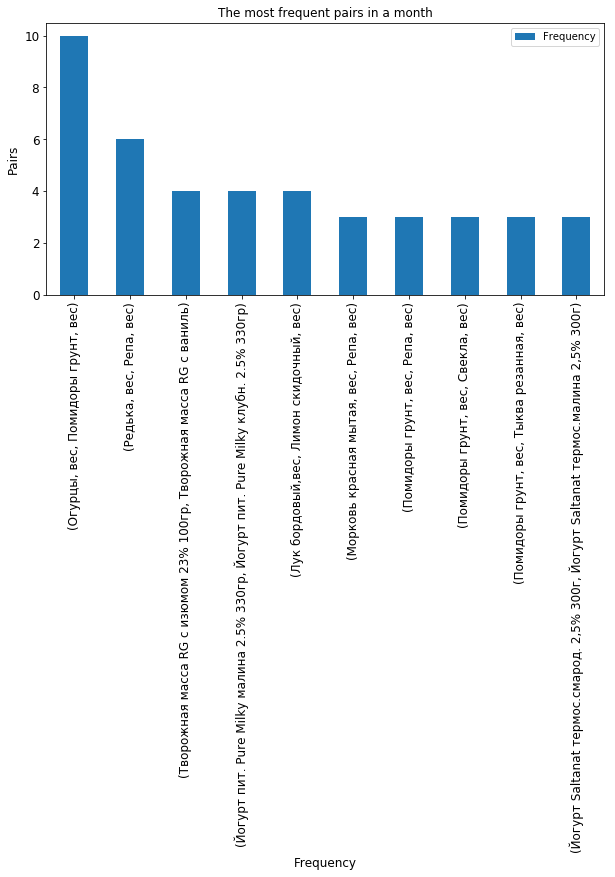

In [112]:
import matplotlib.pyplot as plt
ax = df_pairs.head(10).plot(kind='bar', title ="The most frequent pairs in a month", x='Product pairs', figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Frequency", fontsize=12)
ax.set_ylabel("Pairs", fontsize=12)
plt.show()

Now we'll try to find average basket size for the whole month

In [62]:
df.head(2)

,branch_name,parent_category_name,category_name,product_name,sales_id,sales_time,amount_sold
0,Shedevr,Вода/Напитки,Соки,Сок Сочная Долина Томатный 1л,010101-00260,2019-04-01 10:32:17,1.0
1,Shedevr,Яйца / Молоко и молочные изделия,Йогурт,Йогурт Нежный 1.2% с соком абр-ман 100г,020303-00129,2019-04-01 18:46:09,1.0


In [83]:
overall_sales = df.groupby(['sales_time'])['amount_sold'].sum().sort_values(ascending=False).values

In [87]:
average_basket = np.sum(overall_sales)/len(overall_sales)

In [90]:
print("Average basket is: ", average_basket)

Average basket is:  1.3308104331625523


Average basket when there are 2 or more products

In [97]:
print("Size of the basket when there are 2 or more products: ", 
      np.round(np.sum(overall_sales[overall_sales>=2])/len(overall_sales[overall_sales>=2]),2))

Size of the basket when there are 2 or more products:  2.49


Now we will add week of the days and day numbers to the dataset

In [116]:
df['day'] = df['sales_time'].dt.day


In [125]:
df['week_day'] = df['sales_time'].dt.dayofweek.replace(to_replace=[0,1,2,3,4,5,6], value=(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]))

In [127]:
df.head(5)

,branch_name,parent_category_name,category_name,product_name,sales_id,sales_time,amount_sold,day,week_day
0,Shedevr,Вода/Напитки,Соки,Сок Сочная Долина Томатный 1л,010101-00260,2019-04-01 10:32:17,1.0,1,Monday
1,Shedevr,Яйца / Молоко и молочные изделия,Йогурт,Йогурт Нежный 1.2% с соком абр-ман 100г,020303-00129,2019-04-01 18:46:09,1.0,1,Monday
2,Shedevr,Яйца / Молоко и молочные изделия,Йогурт,Йогурт Saltanat термос. греческий 4% 300г,020303-00473,2019-04-01 12:44:54,1.0,1,Monday
3,Shedevr,Яйца / Молоко и молочные изделия,Творог,Творог Домашний 9 % 400 гр,020401-00075,2019-04-01 11:33:28,1.0,1,Monday
4,Shedevr,Яйца / Молоко и молочные изделия,Каймак/Сливки,Каймак Домашний 50% 200гр,020503-00026,2019-04-01 11:33:28,1.0,1,Monday


The following groups will filter the highest sales (1) per day (2) per day, per brach (3) per week day

In [157]:
df.groupby("day").sum()
# df.groupby("day").sum().to_excel('daily_max.xlsx')

In [155]:
df.groupby('week_day')['amount_sold'].sum()
# df.groupby('week_day')['amount_sold'].sum().to_excel('weekly_max.xlsx')

In [180]:
by_branch = df.groupby(['branch_name', 'day'])['amount_sold'].sum()
by_branch.loc['Shedevr']
#by_branch.loc['Караташ'].to_excel('Караташ_daily_highest.xlsx')
#by_branch.loc['Салом'].to_excel('Салом_daily_highest.xlsx')
#by_branch.loc['Сергели'].to_excel('Сергели_daily_highest.xlsx')
#by_branch.loc['Салом'].to_excel('Салом_daily_highest.xlsx')
#by_branch.loc['Файзабад'].to_excel('Файзабад_daily_highest.xlsx')
#by_branch.loc['Чиланзар'].to_excel('Чиланзар_daily_highest.xlsx')
#by_branch.loc['Юнусобод'].to_excel('Юнусобод_daily_highest.xlsx')


KeyError: 'day'

In [152]:
np.unique(df['branch_name'].values)

array(['Shedevr', 'Караташ', 'Салом', 'Сергели', 'Файзабад', 'Чиланзар',
       'Юнусобод'], dtype=object)

In [160]:
df.groupby('branch_name')['amount_sold'].sum()
# df.groupby('branch_name')['amount_sold'].sum().to_excel('by_branch_max.xlsx')

In [170]:
df.groupby(['branch_name', 'week_day'])['amount_sold'].sum().unstack()

week_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
branch_name,,,,,,,
Shedevr,413.0,434.0,451.0,385.0,340.0,517.0,378.0
Караташ,153.0,132.0,164.0,167.0,103.0,189.0,156.0
Салом,173.0,303.0,225.0,317.0,177.0,238.0,210.0
Сергели,141.0,161.0,123.0,177.0,103.0,212.0,150.0
Файзабад,148.0,156.0,126.0,149.0,132.0,102.0,118.0
Чиланзар,276.0,286.0,273.0,279.0,224.0,220.0,232.0
Юнусобод,324.0,257.0,266.0,322.0,255.0,358.0,234.0
